In [2]:
from typing import List

import pandas as pd
from openai import OpenAI

from api_key import OPENAI_API_KEY

In [3]:
client = OpenAI(max_retries=5, api_key=OPENAI_API_KEY)
def get_embedding(text: str, model="text-embedding-3-small") -> List[float]:
    return client.embeddings.create(input=[text], model=model).data[0].embedding

In [19]:
words = [
    "king", "queen", "male", "female", "apple"
]

embeddings = [{"word": word, "embedding": get_embedding(word)} for word in words]

In [20]:
df = pd.DataFrame(embeddings)
df.head()

,word,embedding
0,king,"[0.037228088825941086, -0.022083600983023643, ..."
1,queen,"[0.043808333575725555, -0.03978610783815384, 0..."
2,male,"[0.0762191042304039, -0.0034149582497775555, 0..."
3,female,"[0.06657705456018448, -0.021973706781864166, -..."
4,apple,"[0.017625167965888977, -0.016837788745760918, ..."


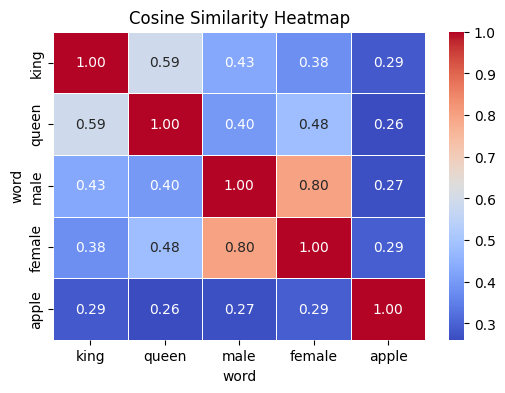

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

embeddings_matrix = np.array(df['embedding'].tolist())
similarity_matrix = cosine_similarity(embeddings_matrix)

similarity_df = pd.DataFrame(similarity_matrix, index=df['word'], columns=df['word'])

plt.figure(figsize=(6, 4))
sns.heatmap(similarity_df, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Cosine Similarity Heatmap')
plt.show()

# Sentence embedding

In [14]:
sentences = [
    "I am happy", "I am very happy", "There is a cat in the room", "There is a dog in the room", "To be or not to be"
]
embeddings_2 = [{"sentence": sentence, "embedding": get_embedding(sentence)} for sentence in sentences]
df_2 = pd.DataFrame(embeddings_2)

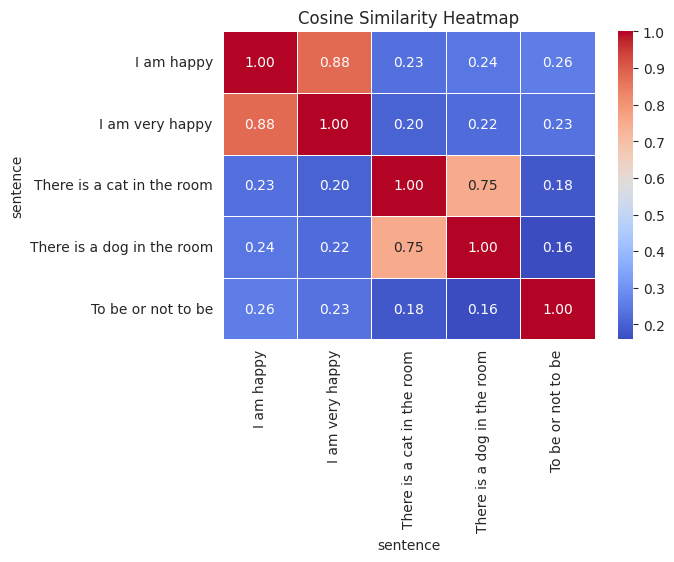

In [15]:
embeddings_matrix = np.array(df_2['embedding'].tolist())
similarity_matrix = cosine_similarity(embeddings_matrix)
similarity_df = pd.DataFrame(similarity_matrix, index=df_2['sentence'], columns=df_2['sentence'])
plt.figure(figsize=(6, 4))
sns.heatmap(similarity_df, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Cosine Similarity Heatmap')
plt.show()